<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/ANN_Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [62]:
!pip install keras_tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.5 MB/s eta 0:00:00


In [116]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras_tuner as kt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
 

from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d spscientist/students-performance-in-exams

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 9.37MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/students-performance-in-exams.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
df = pd.read_csv('/content/StudentsPerformance.csv')

## Basic Analysis

In [10]:
df.shape

(1000, 8)

In [11]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
820,female,group A,some high school,standard,completed,85,90,92
313,female,group C,associate's degree,free/reduced,completed,68,67,69
527,female,group C,high school,free/reduced,none,36,53,43
191,male,group D,some college,standard,completed,76,83,79
429,male,group C,some high school,free/reduced,none,68,63,54


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## EDA

### EDA for writing score and reading score

In [16]:
df_WS = df.drop('reading score',axis=1)
df_RS = df.drop('writing score',axis=1)

In [17]:
def seperateFeaturesAndTarget(df,target_name):
  numericFeatures = list()
  categoricalFeatures = list()
  target = None

  for feature in df.columns:
    if (df[feature].dtype == 'int64' or df[feature].dtype == 'float64')  and feature != target_name:
      numericFeatures.append(feature)
    elif  df[feature].dtype == 'object':
      categoricalFeatures.append(feature)
    else:
      target = feature
  print(f'target : {target}\nNumeric : {numericFeatures}\ncategorical : {categoricalFeatures}')
  return numericFeatures,categoricalFeatures,target

In [18]:
numericFeatures_WS,categoricalFeatures_WS,target_WS = seperateFeaturesAndTarget(df_WS,'writing score')
numericFeatures_RS,categoricalFeatures_RS,target_RS = seperateFeaturesAndTarget(df_RS,'reading score')

target : writing score
Numeric : ['math score']
categorical : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
target : reading score
Numeric : ['math score']
categorical : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Univariant Analysis for both target columns

In [19]:
def showNumericAnalysis(df,numericFeatures):
  for feature in numericFeatures:
    fig, ax = plt.subplots(1,4,figsize=(20, 5))
    sns.histplot(df[feature], ax=ax[0])
    sns.distplot(df[feature], ax=ax[1])
    sns.boxplot(df[feature],ax=ax[2])
    stats.probplot(df[feature], plot=ax[3], fit=True)
    fig.show()

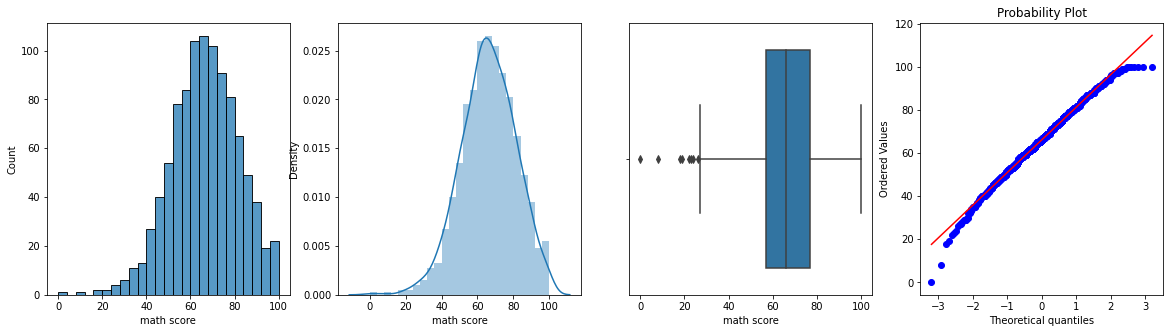

In [20]:
showNumericAnalysis(df_WS,numericFeatures_WS)

In [21]:
def showCategoricalFeatures(df,categoricalFeatures):
  for feature in categoricalFeatures:
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    sns.countplot(df[feature], ax=ax[0])
    df[feature].value_counts().plot(kind='pie',autopct='%.2f')
    fig.show()

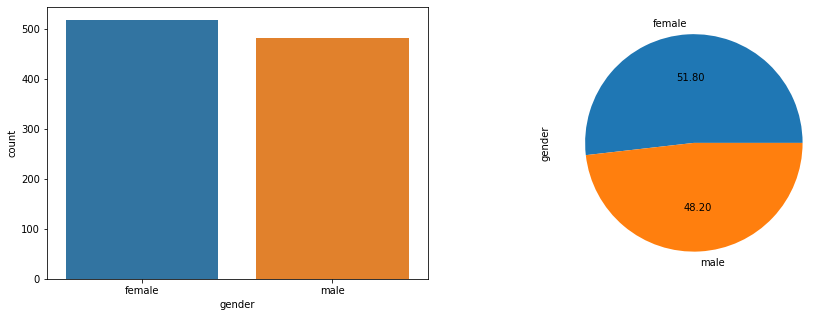

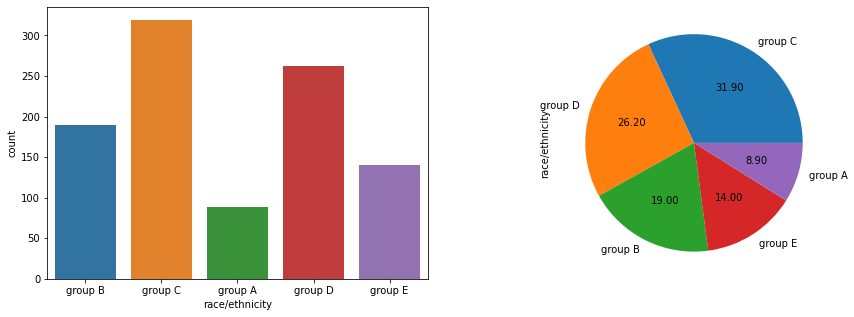

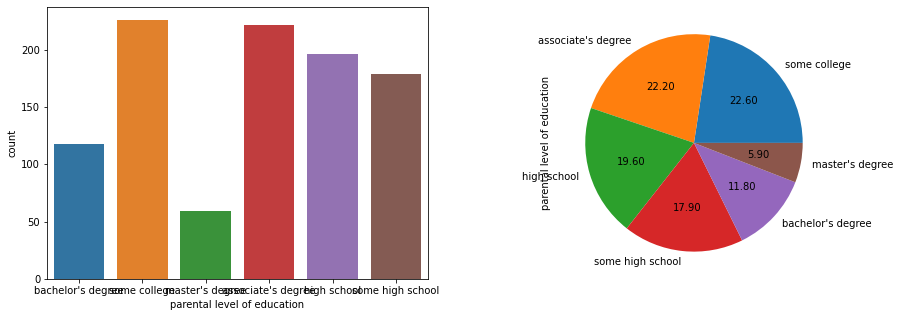

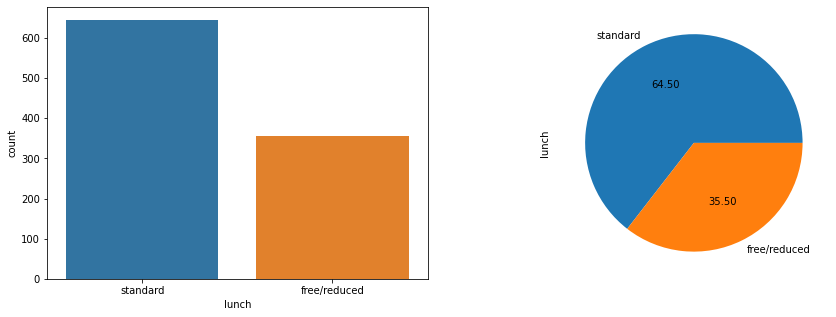

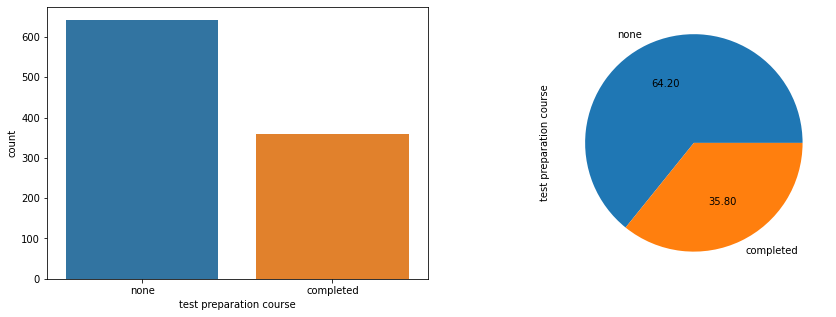

In [22]:
showCategoricalFeatures(df_WS,categoricalFeatures_WS)

### Multi-varient Aanlysis for both output column

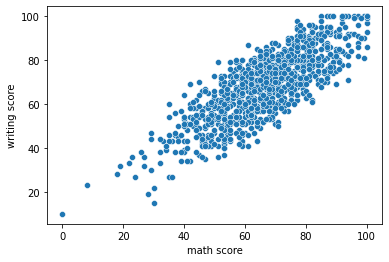

In [26]:
sns.scatterplot(df['math score'],df[target_WS])
plt.show()

<AxesSubplot:xlabel='math score', ylabel='writing score'>

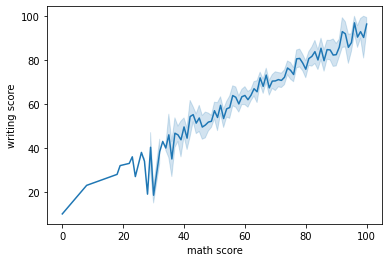

In [27]:
sns.lineplot(df['math score'],df[target_WS])

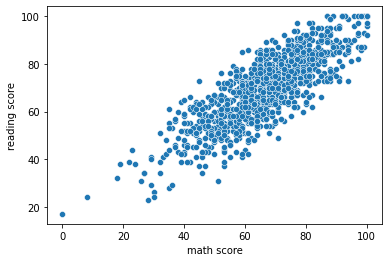

In [25]:
sns.scatterplot(df['math score'],df[target_RS])
plt.show()

<AxesSubplot:xlabel='math score', ylabel='reading score'>

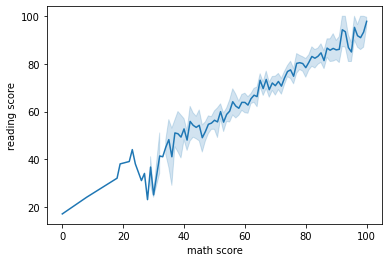

In [28]:
sns.lineplot(df['math score'],df[target_RS])

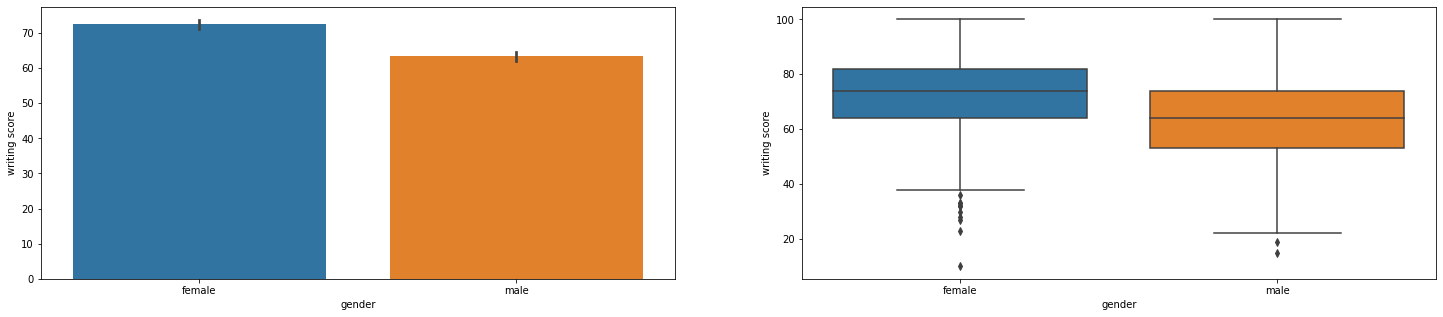

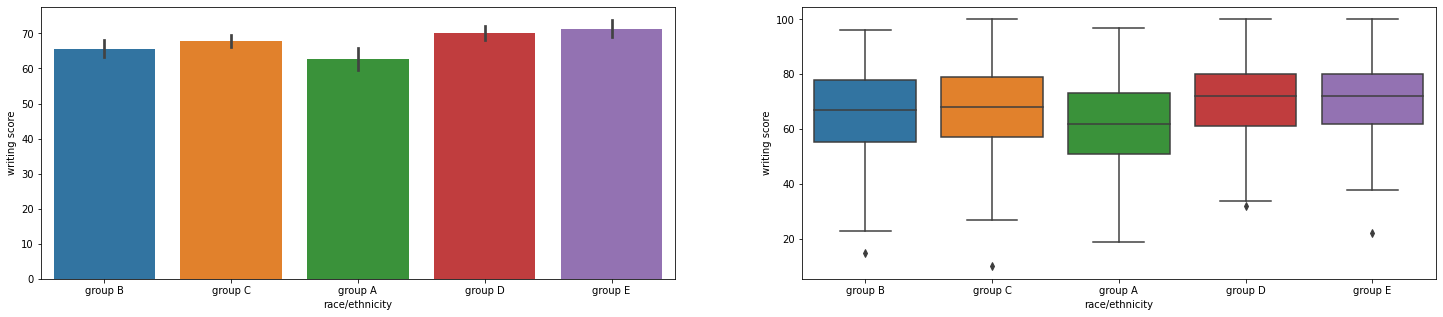

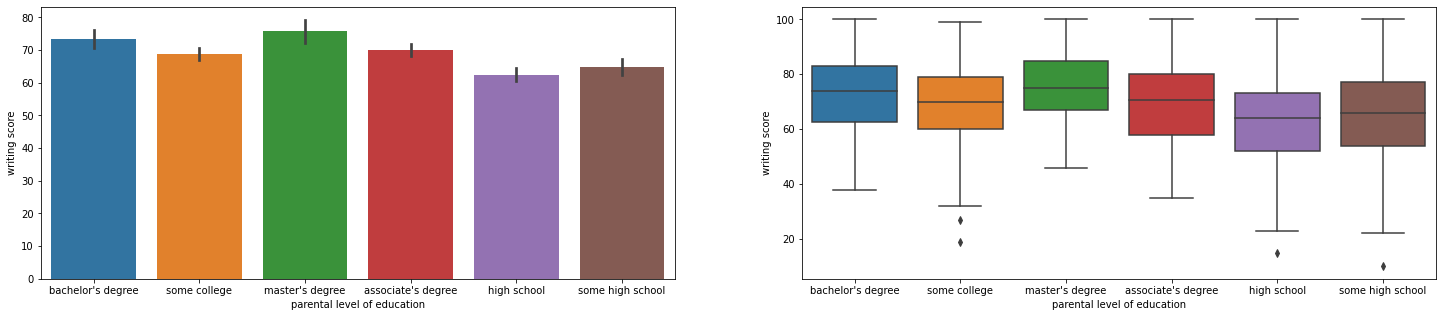

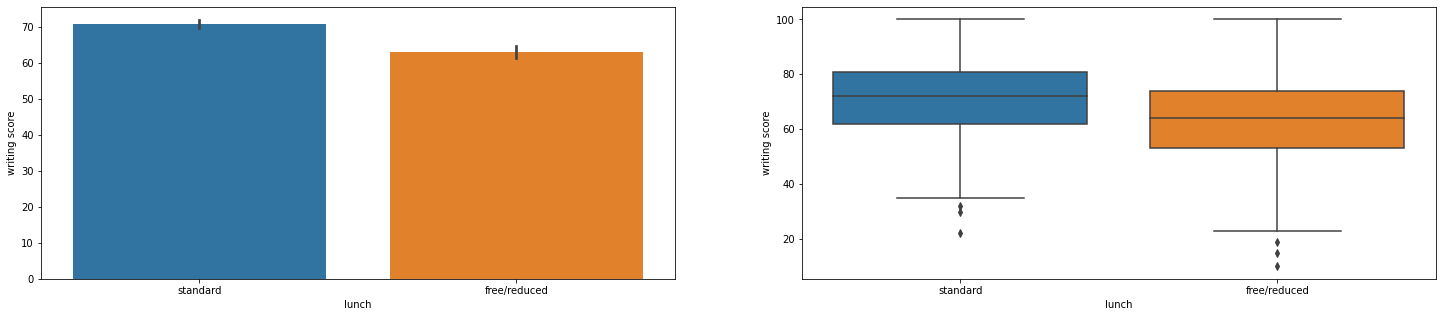

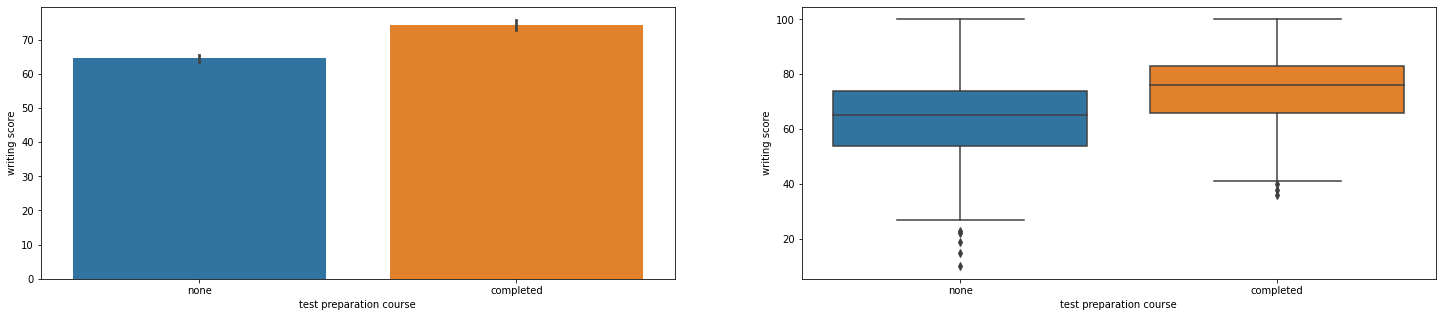

In [31]:
for feature in categoricalFeatures_WS:
  fig, ax = plt.subplots(1,2,figsize=(25, 5))
  sns.barplot(df[feature],df[target_WS],ax=ax[0])
  sns.boxplot(df[feature],df[target_WS],ax=ax[1])
  fig.show()

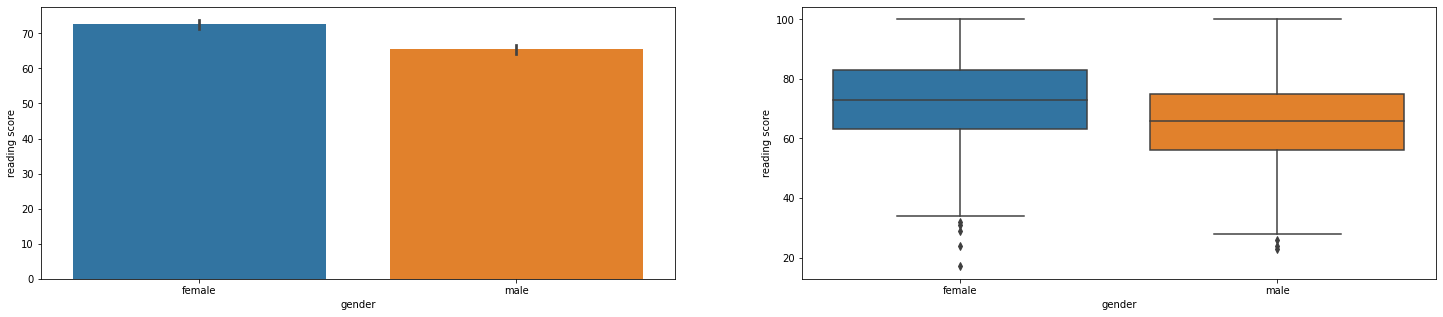

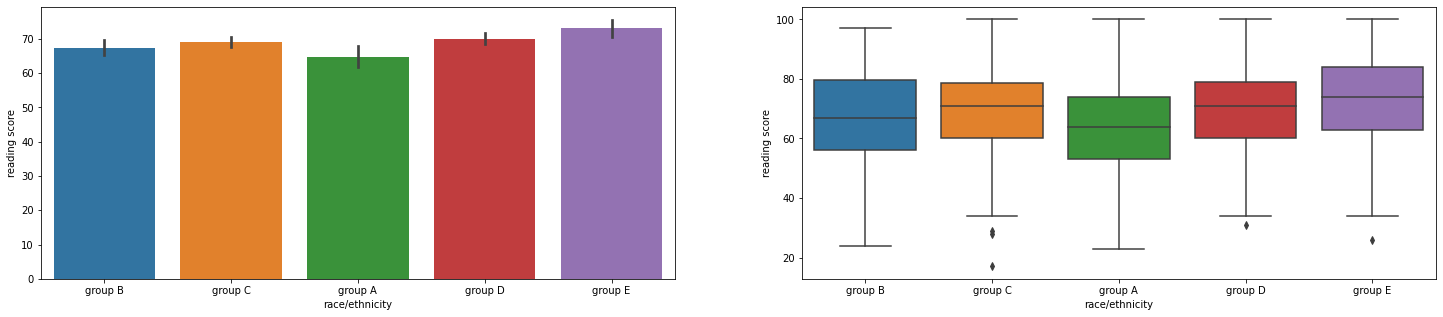

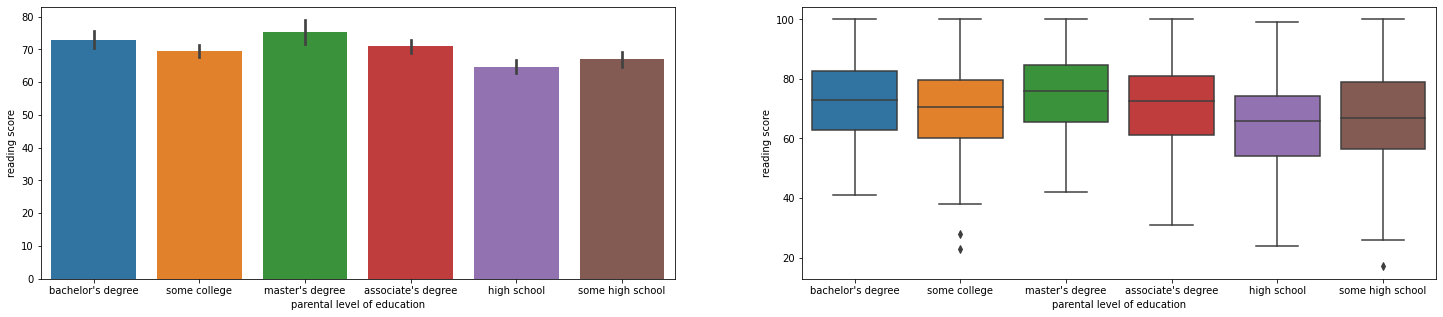

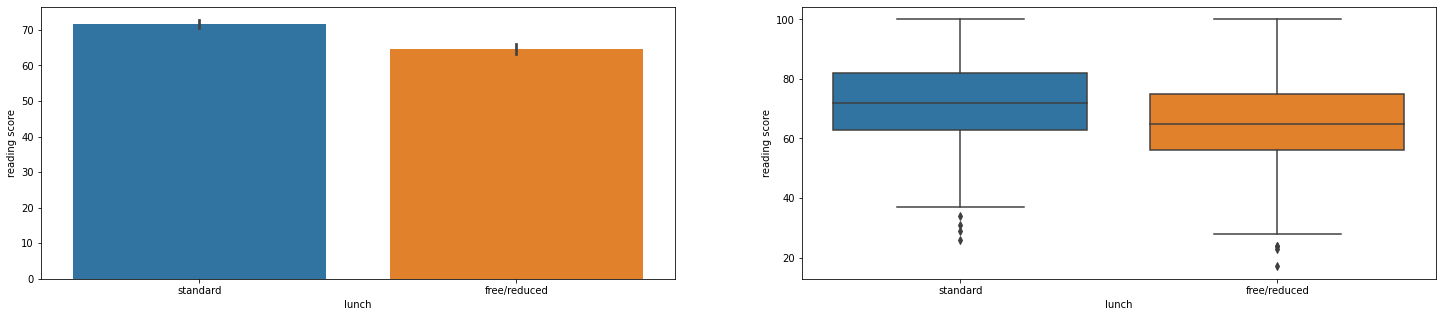

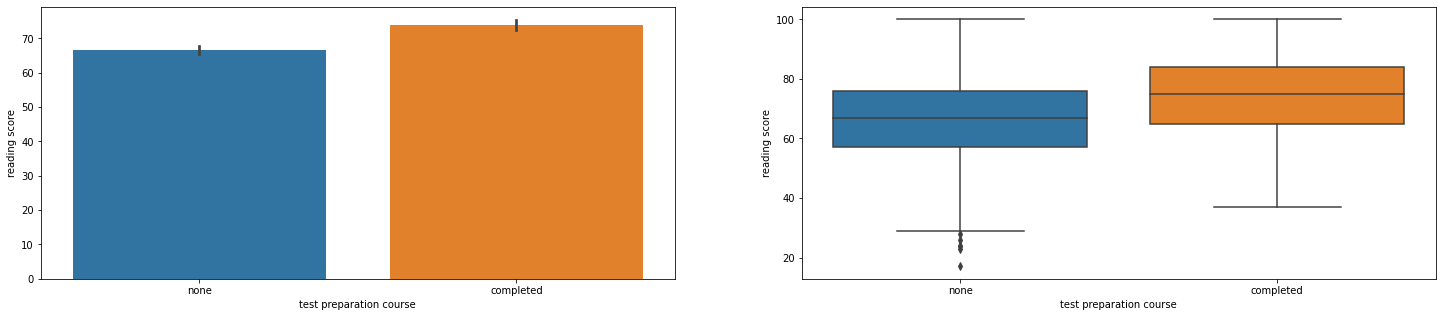

In [32]:
for feature in categoricalFeatures_WS:
  fig, ax = plt.subplots(1,2,figsize=(25, 5))
  sns.barplot(df[feature],df[target_RS],ax=ax[0])
  sns.boxplot(df[feature],df[target_RS],ax=ax[1])
  fig.show()

## Feature Engineering

#### Handling Outliers

In [43]:
def handleOutlierUsingIQR(feature,df):
  percentile_75 = np.percentile(df[feature],75)
  percentile_25 =  np.percentile(df[feature],25)

  IQR = percentile_75 - percentile_25

  UpperFence = percentile_75 + 1.5 * IQR
  LowerFence = percentile_25 - 1.5 * IQR

  df[feature] = np.where(df[feature] > UpperFence,UpperFence,np.where(df[feature] < LowerFence,LowerFence,df[feature]))

In [44]:
handleOutlierUsingIQR('math score',df_RS)
handleOutlierUsingIQR('math score',df_WS)

#### Handling Categorical Features

In [46]:
df_WS = pd.get_dummies(df_WS,columns=categoricalFeatures_WS,drop_first=True)
df_RS = pd.get_dummies(df_RS,columns=categoricalFeatures_WS,drop_first=True)

In [48]:
df_RS.sample(5)

,math score,reading score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
298,40.0,46,1,0,1,0,0,0,1,0,0,0,0,0
739,61.0,60,1,0,1,0,0,0,1,0,0,0,0,1
692,66.0,74,0,0,1,0,0,1,0,0,0,0,0,0
211,35.0,28,1,0,1,0,0,0,0,0,1,0,0,1
888,69.0,65,0,0,0,1,0,0,0,0,1,0,0,1


#### Scaling and spliting

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_WS.drop('writing score',axis=1), df_WS['writing score'], test_size=0.33, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 13), (330, 13), (670,), (330,))

In [57]:
MinMaxScaler = MinMaxScaler(feature_range=(0, 1))

In [58]:
MinMaxScaler = MinMaxScaler.fit(X_train,y_train)

In [59]:
X_train = MinMaxScaler.transform(X_train)
X_test = MinMaxScaler.transform(X_test)

### Model Build and Evaluation

In [128]:
adam = keras.optimizers.Adam(
    learning_rate=0.01
)

In [129]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [130]:
model = Sequential()

initializer = keras.initializers.HeUniform()

model.add(Dense(5,activation='relu',kernel_initializer=initializer,input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(5,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='linear'))

model.compile(optimizer=adam,loss='mean_squared_error',metrics=['mae'])

In [131]:
history = model.fit(X_train,y_train,batch_size=X_train.shape[0]//10,epochs=100,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/100
10/10 [==============================] - 2s 24ms/step - loss: 4892.6694 - mae: 68.4500 - val_loss: 4663.2065 - val_mae: 66.4060
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 4828.7729 - mae: 68.0649 - val_loss: 4612.8096 - val_mae: 66.0751
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 4743.9810 - mae: 67.5480 - val_loss: 4536.8203 - val_mae: 65.5791
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 4630.9238 - mae: 66.8677 - val_loss: 4419.1733 - val_mae: 64.8021
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 4487.7842 - mae: 65.9986 - val_loss: 4211.5386 - val_mae: 63.3393
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 4318.0664 - mae: 64.9202 - val_loss: 3890.0798 - val_mae: 60.9374
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 4121.6543 - mae: 63.6224 - val_loss: 3366.0342 - val_mae: 56.6525
Epoch 8/100
10/10 [=======

#### Comparing Basic ANN Model and ANN model with Batch Normalisation Layer + Weight Initialisation (HeUniform) + Early stopping

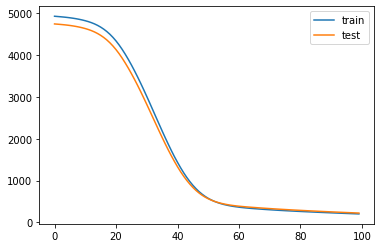

In [75]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

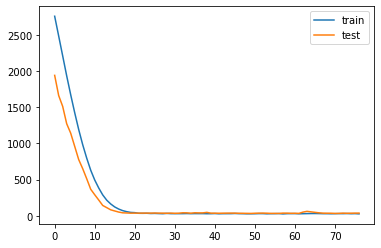

In [112]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

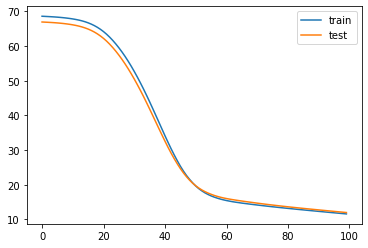

In [76]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
     

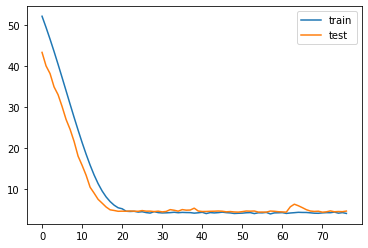

In [113]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
     

In [132]:
train_pred = model.predict(X_train)

21/21 [==============================] - 0s 2ms/step


In [134]:
r2_score(y_train,train_pred)

0.8885903220528679

In [135]:
test_pred = model.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [136]:
r2_score(y_test,test_pred)

0.8748906491994752